In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/GSET"

In [ ]:
%cd /content/drive/MyDrive/GSET

/content/drive/MyDrive/GSET


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import csv
from random import shuffle
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import shutil
import time
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

## Setting up the Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GSET/NIRData.csv')

In [ ]:
df

,Analog Value (mV),Glucose Values (mg/dl)
0,499,142
1,509,146
2,519,156
3,519,157
4,548,177
...,...,...
75,964,310
76,735,217
77,721,209
78,599,195


In [ ]:
X = df[['Analog Value (mV)']]
y = df['Glucose Values (mg/dl)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Defining Reusable Functions

In [ ]:
def calculate_metrics(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)

  rmse = mean_squared_error(y_test, y_pred, squared=False)

  mae = mean_absolute_error(y_pred, y_pred)

  r2 = r2_score(y_test, y_pred)

  return mse, rmse, mae, r2


## Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_)

[0.34383613]


In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

Slope: 0.34383613317040845
Intercept: -24.50692695287003


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[179.38790002 147.0673035  194.17285374 182.82626135 261.90857198
 272.56749211 179.04406388 151.1933371  163.91527402 184.20160588
 154.97553456 230.27564773 231.99482839 181.45091682 191.76600081
 155.66320683]


In [ ]:
print(y_test)

30    179
0     142
22    178
31    186
18    248
28    272
10    175
70    156
4     177
12    196
49    158
33    221
67    221
35    191
68    183
45    163
Name: Glucose Values (mg/dl), dtype: int64


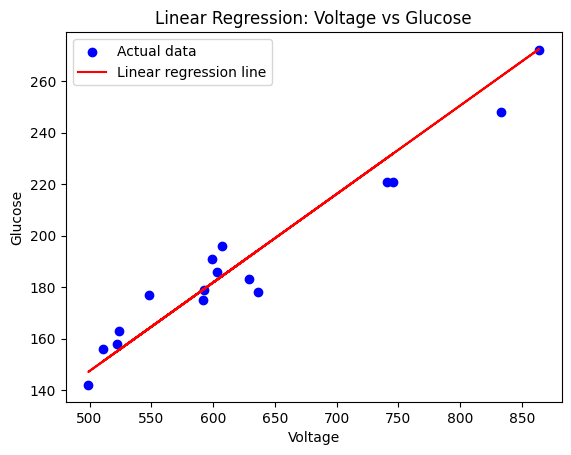

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')

plt.plot(X_test, y_pred, color='red', label='Linear regression line')

plt.xlabel('Voltage')
plt.ylabel('Glucose')
plt.title('Linear Regression: Voltage vs Glucose')
plt.legend()
plt.show()

In [ ]:
linear_mse, linear_rmse, linear_mae, linear_r2 = calculate_metrics(y_test, y_pred)
print(f'Mean Squared Error: {linear_mse}')
print(f'Root Mean Squared Error: {linear_rmse}')
print(f'Mean Absolute Error: {linear_mae}')
print(f'R^2 score: {linear_r2}')

Mean Squared Error: 79.93940399870701
Root Mean Squared Error: 8.940883848854487
Mean Absolute Error: 0.0
R^2 score: 0.9288706347280263


## Polynomial Regression From Original Paper

In [ ]:
def predict_y(x):
    return (3 * 10**-5) * x**2 + 0.2903 * x - 4.798

y_pred = predict_y(X_test)
print(X_test)

    Analog Value (mV)
30                593
0                 499
22                636
31                603
18                833
28                864
10                592
70                511
4                 548
12                607
49                522
33                741
67                746
35                599
68                629
45                524


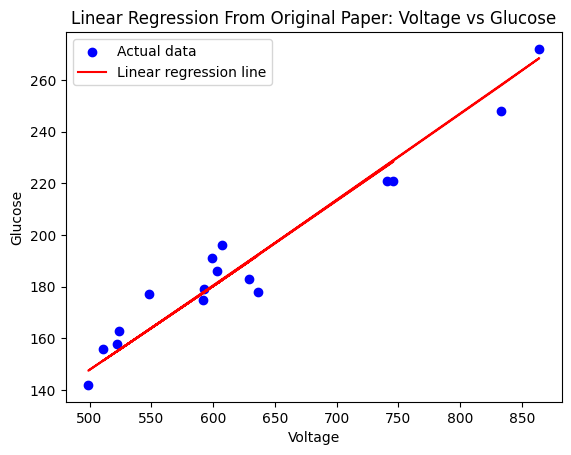

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')

plt.plot(X_test, y_pred, color='red', label='Linear regression line')

plt.xlabel('Voltage')
plt.ylabel('Glucose')
plt.title('Linear Regression From Original Paper: Voltage vs Glucose')
plt.legend()
plt.show()

In [ ]:
linear_mse, linear_rmse, linear_mae, linear_r2 = calculate_metrics(y_test, y_pred)
print(f'Mean Squared Error: {linear_mse}')
print(f'Root Mean Squared Error: {linear_rmse}')
print(f'Mean Absolute Error: {linear_mae}')
print(f'R^2 score: {linear_r2}')

Mean Squared Error: 67.60343338480634
Root Mean Squared Error: 8.222130708326542
Mean Absolute Error: 0.0
R^2 score: 0.9398470708269828


## Polynomial Regression

In [ ]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)


model = LinearRegression()
model.fit(X_poly_train, y_train)


print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)

Coefficients: [0.00000000e+00 2.40360121e-01 7.24254450e-05]
Intercept: 10.416395074362839


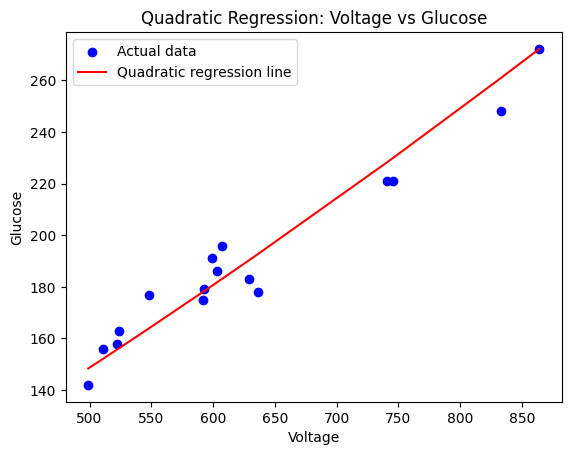

Mean Squared Error: 72.21346000730101
Root Mean Squared Error: 8.497850316833135
Mean Absolute Error: 0.0
R^2 score: 0.9357451104527192


In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')


sorted_idx = np.argsort(X_test.values.flatten())
plt.plot(X_test.values.flatten()[sorted_idx], y_pred_test[sorted_idx], color='red', label='Quadratic regression line')

plt.xlabel('Voltage')
plt.ylabel('Glucose')
plt.title('Quadratic Regression: Voltage vs Glucose')
plt.legend()
plt.show()


quadratic_mse, quadratic_rmse, quadratic_mae, quadratic_r2 = calculate_metrics(y_test, y_pred_test)
print(f'Mean Squared Error: {quadratic_mse}')
print(f'Root Mean Squared Error: {quadratic_rmse}')
print(f'Mean Absolute Error: {quadratic_mae}')
print(f'R^2 score: {quadratic_r2}')

## Decision Trees

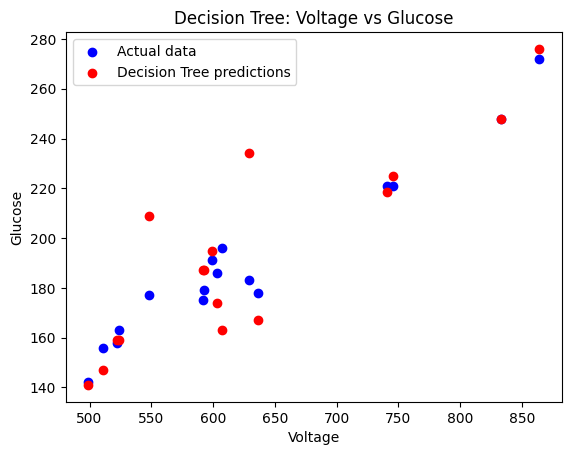

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.scatter(X_test, y_pred_dt, color='red', label='Decision Tree predictions')
plt.xlabel('Voltage')
plt.ylabel('Glucose')
plt.title('Decision Tree: Voltage vs Glucose')
plt.legend()
plt.show()

In [ ]:
dt_mse, dt_rmse, dt_mae, dt_r2 = calculate_metrics(y_test, y_pred_dt)
print(f'Decision Tree - Mean Squared Error: {dt_mse}')
print(f'Decision Tree - Root Mean Squared Error: {dt_rmse}')
print(f'Decision Tree - Mean Absolute Error: {dt_mae}')
print(f'Decision Tree - R^2 score: {dt_r2}')

Decision Tree - Mean Squared Error: 333.765625
Decision Tree - Root Mean Squared Error: 18.269253542495928
Decision Tree - Mean Absolute Error: 0.0
Decision Tree - R^2 score: 0.7030183380371766


## Random Forests

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

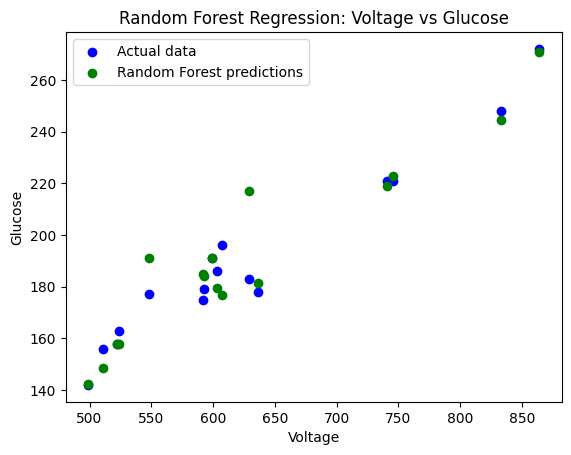

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.scatter(X_test, y_pred_rf, color='green', label='Random Forest predictions')
plt.xlabel('Voltage')
plt.ylabel('Glucose')
plt.title('Random Forest Regression: Voltage vs Glucose')
plt.legend()
plt.show()

In [ ]:
rf_mse, rf_rmse, rf_mae, rf_r2 = calculate_metrics(y_test, y_pred_rf)
print(f'Random Forest - Mean Squared Error: {rf_mse}')
print(f'Random Forest - Root Mean Squared Error: {rf_rmse}')
print(f'Random Forest - Mean Absolute Error: {rf_mae}')
print(f'Random Forest - R^2 score: {rf_r2}')

Random Forest - Mean Squared Error: 126.60811072034434
Random Forest - Root Mean Squared Error: 11.25202696052335
Random Forest - Mean Absolute Error: 0.0
Random Forest - R^2 score: 0.8873452377257214


## Support Vector Regression

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [ ]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train_scaled)


SVR()

In [ ]:
y_pred_train_scaled = svr_model.predict(X_train_scaled)
y_pred_test_scaled = svr_model.predict(X_test_scaled)


y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()
y_train_inv = scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_test_inv = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()


svr_mse_train = mean_squared_error(y_train_inv, y_pred_train)
svr_mse_test = mean_squared_error(y_test_inv, y_pred_test)
svr_rmse_train = np.sqrt(svr_mse_train)
svr_rmse_test = np.sqrt(svr_mse_test)
svr_mae_train = mean_absolute_error(y_train_inv, y_pred_train)
svr_mae_test = mean_absolute_error(y_test_inv, y_pred_test)
svr_r2_train = r2_score(y_train_inv, y_pred_train)
svr_r2_test = r2_score(y_test_inv, y_pred_test)

print(f'Training Mean Squared Error: {svr_mse_train}')
print(f'Testing Mean Squared Error: {svr_mse_test}')
print(f'Training Root Mean Squared Error: {svr_rmse_train}')
print(f'Testing Root Mean Squared Error: {svr_rmse_test}')
print(f'Training Mean Absolute Error: {svr_mae_train}')
print(f'Testing Mean Absolute Error: {svr_mae_test}')
print(f'Training R^2 score: {svr_r2_train}')
print(f'Testing R^2 score: {svr_r2_test}')


Training Mean Squared Error: 292.9136300419916
Testing Mean Squared Error: 58.75030930018829
Training Root Mean Squared Error: 17.114719689261392
Testing Root Mean Squared Error: 7.664875034870972
Training Mean Absolute Error: 10.601063871962708
Testing Mean Absolute Error: 6.362498850148784
Training R^2 score: 0.906703217738745
Testing R^2 score: 0.9477245012969809


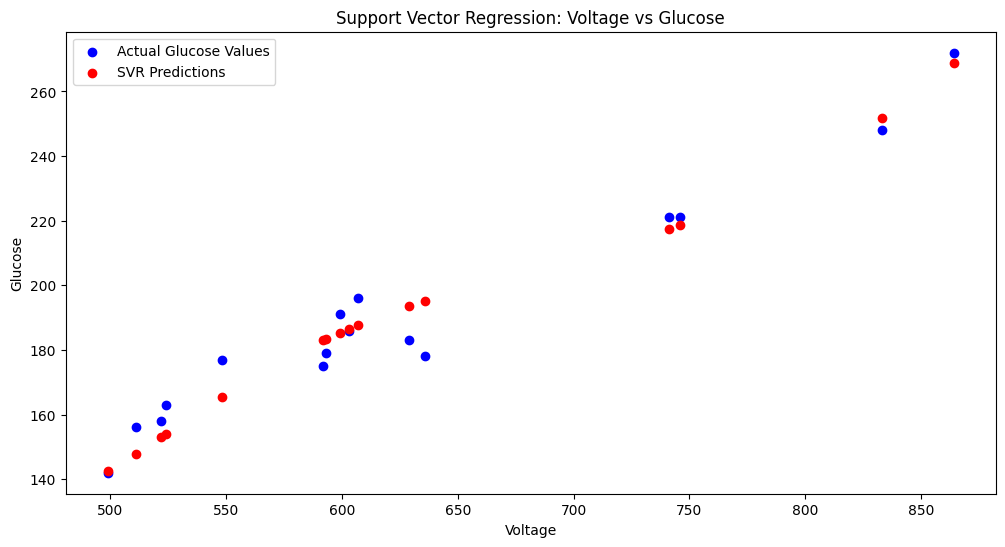

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test_inv, color='blue', label='Actual Glucose Values')
plt.scatter(X_test, y_pred_test, color='red', label='SVR Predictions')
plt.xlabel('Voltage')
plt.ylabel('Glucose')
plt.title('Support Vector Regression: Voltage vs Glucose')
plt.legend()
plt.show()


## K-Nearest Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=14)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

knn_mse, knn_rmse, knn_mae, knn_r2 = calculate_metrics(y_test, y_pred_knn)
print(f'KNN - Mean Squared Error: {knn_mse}')
print(f'KNN - Root Mean Squared Error: {knn_rmse}')
print(f'KNN - Mean Absolute Error: {knn_mae}')
print(f'KNN - R^2 score: {knn_r2}')


KNN - Mean Squared Error: 34.30516581632654
KNN - Root Mean Squared Error: 5.857061192810482
KNN - Mean Absolute Error: 0.0
KNN - R^2 score: 0.969475570894867


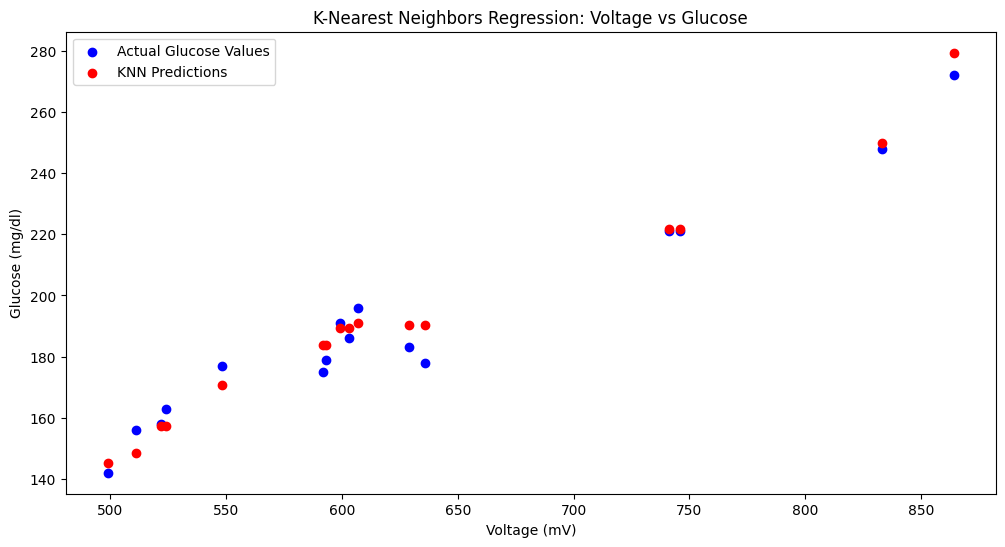

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Glucose Values')
plt.scatter(X_test, y_pred_knn, color='red', label='KNN Predictions')
plt.xlabel('Voltage (mV)')
plt.ylabel('Glucose (mg/dl)')
plt.title('K-Nearest Neighbors Regression: Voltage vs Glucose')
plt.legend()
plt.show()